## Exploratory Data Analysis (EDA) of MovieLens Data set

In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
DATASET_LINK='http://files.grouplens.org/datasets/movielens/ml-25m.zip'

In [12]:
!wget -nc http://files.grouplens.org/datasets/movielens/ml-100k.zip
!unzip -n ml-100k.zip

--2022-10-16 21:00:56--  http://files.grouplens.org/datasets/movielens/ml-100k.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4924029 (4.7M) [application/zip]
Saving to: ‘ml-100k.zip’

ml-100k.zip         100%[===================>]   4.70M  16.7MB/s    in 0.3s    

2022-10-16 21:00:56 (16.7 MB/s) - ‘ml-100k.zip’ saved [4924029/4924029]

Archive:  ml-100k.zip
   creating: ml-100k/
  inflating: ml-100k/allbut.pl       
  inflating: ml-100k/mku.sh          
  inflating: ml-100k/README          
  inflating: ml-100k/u.data          
  inflating: ml-100k/u.genre         
  inflating: ml-100k/u.info          
  inflating: ml-100k/u.item          
  inflating: ml-100k/u.occupation    
  inflating: ml-100k/u.user          
  inflating: ml-100k/u1.base         
  inflating: ml-100k/u1.test         
  inflating: ml-100k/u2.base

In [4]:
!wget -nc http://files.grouplens.org/datasets/movielens/ml-25m.zip
!unzip -n ml-25m.zip

--2022-10-16 20:52:09--  http://files.grouplens.org/datasets/movielens/ml-25m.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 261978986 (250M) [application/zip]
Saving to: ‘ml-25m.zip’

ml-25m.zip          100%[===================>] 249.84M  73.8MB/s    in 3.6s    

2022-10-16 20:52:13 (69.5 MB/s) - ‘ml-25m.zip’ saved [261978986/261978986]

Archive:  ml-25m.zip
   creating: ml-25m/
  inflating: ml-25m/tags.csv         
  inflating: ml-25m/links.csv        
  inflating: ml-25m/README.txt       
  inflating: ml-25m/ratings.csv      
  inflating: ml-25m/genome-tags.csv  
  inflating: ml-25m/genome-scores.csv  
  inflating: ml-25m/movies.csv       


In [8]:
movies = pd.read_csv('ml-25m/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [9]:
ratings = pd.read_csv('ml-25m/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [15]:
len(ratings), max(ratings['movieId']),min(ratings['movieId'])

(25000095, 209171, 1)

In [25]:
Merged_movies_ratings = pd.merge(movies,ratings,on="movieId")
Merged_movies_ratings

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,3.5,1141415820
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,1439472215
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4,3.0,1573944252
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,858625949
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,890492517
...,...,...,...,...,...,...
25000090,209157,We (2018),Drama,119571,1.5,1574280748
25000091,209159,Window of the Soul (2001),Documentary,115835,3.0,1574280985
25000092,209163,Bad Poems (2018),Comedy|Drama,6964,4.5,1574284913
25000093,209169,A Girl Thing (2001),(no genres listed),119571,3.0,1574291826


In [26]:
Merged_movies_ratings.describe()

,movieId,userId,rating,timestamp
count,2.500010e+07,2.500010e+07,2.500010e+07,2.500010e+07
mean,2.138798e+04,8.118928e+04,3.533854e+00,1.215601e+09
std,3.919886e+04,4.679172e+04,1.060744e+00,2.268758e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,1.196000e+03,4.051000e+04,3.000000e+00,1.011747e+09
50%,2.947000e+03,8.091400e+04,3.500000e+00,1.198868e+09
75%,8.623000e+03,1.215570e+05,4.000000e+00,1.447205e+09
max,2.091710e+05,1.625410e+05,5.000000e+00,1.574328e+09


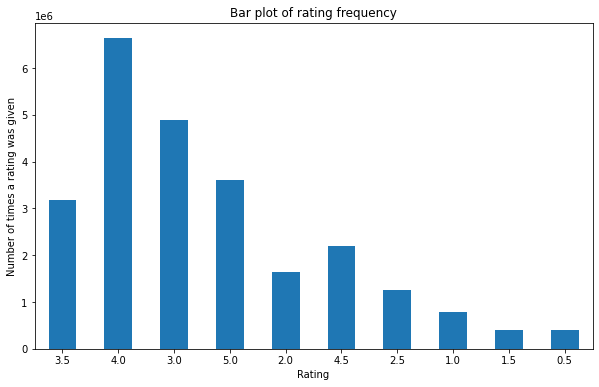

In [28]:
Merged_movies_ratings['rating'].value_counts(sort=False).plot(kind='bar' ,figsize=(10,6), use_index = True, rot=0)
plt.title('Bar plot of rating frequency')
plt.xlabel('Rating')
plt.ylabel('Number of times a rating was given')
label = list(Merged_movies_ratings['rating'].value_counts(sort=False))
r4 = [1,2,3,4,5]
plt.savefig('ratings_frequency.png')

We can observe that most of the users have rewarded movies they watched with a 4 star rating and followed by 3 star and 5 star.

In [32]:
avg_highly_rated_movies = Merged_movies_ratings.groupby(['title']).agg({"rating":"mean"})['rating'].sort_values(ascending=False)
avg_highly_rated_movies = avg_highly_rated_movies.to_frame()
avg_highly_rated_movies.head(20)

,rating
title,
Full of Grace (2015),5.0
Geordie (1955),5.0
Garfield In Paradise (1986),5.0
Lost Woods (2012),5.0
Garfield in the Rough (1984),5.0
Lost Time (2014),5.0
Who Killed Chea Vichea? (2010),5.0
Lost Rivers (2013),5.0
Who Killed Johnny (2013),5.0


In [33]:
print("Number of movies with 5 star rating on average: ",len(avg_highly_rated_movies[avg_highly_rated_movies['rating'] == 5.0]))
print("Number of movies with above 4 star and below 5 star rating on average: ",len(avg_highly_rated_movies[(avg_highly_rated_movies['rating'] >= 4.0) & (avg_highly_rated_movies['rating'] < 5.0)]))
print("Number of movies with above 3 star and below 4 star rating on average: ",len(avg_highly_rated_movies[(avg_highly_rated_movies['rating'] >= 3.0) & (avg_highly_rated_movies['rating'] < 4.0)]))
print("Number of movies with above 2 star and below 3 star rating on average: ",len(avg_highly_rated_movies[(avg_highly_rated_movies['rating'] >= 2.0) & (avg_highly_rated_movies['rating'] < 3.0)]))
print("Number of movies with above 1 star and below 2 star rating on average: ",len(avg_highly_rated_movies[(avg_highly_rated_movies['rating'] >= 1.0) & (avg_highly_rated_movies['rating'] < 2.0)]))
print("Number of movies with below 1 star rating on average: ", len(avg_highly_rated_movies[(avg_highly_rated_movies['rating'] < 1.0)]))

Number of movies with 5 star rating on average:  851
Number of movies with above 4 star and below 5 star rating on average:  3834
Number of movies with above 3 star and below 4 star rating on average:  32873
Number of movies with above 2 star and below 3 star rating on average:  17527
Number of movies with above 1 star and below 2 star rating on average:  3193
Number of movies with below 1 star rating on average:  680


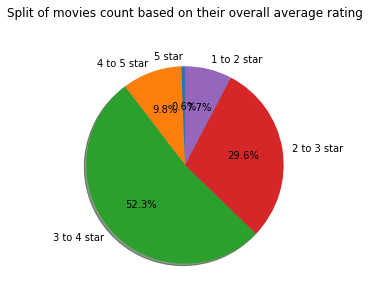

<Figure size 432x288 with 0 Axes>

In [34]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = '5 star', '4 to 5 star', '3 to 4 star', '2 to 3 star', '1 to 2 star'
sizes = [10, 163, 871, 492, 128]
# explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

from matplotlib import rcParams
rcParams['axes.titlepad'] = 40 


plt.title("Split of movies count based on their overall average rating")
plt.show()
plt.savefig('average_ratings.png')

In [35]:
avg_highly_rated_movies.reset_index(level=0, inplace=True)

avg_highly_rated_movies.columns = ['movie title', 'avg rating']

avg_highly_rated_movies.head(10)

,movie title,avg rating
0,Full of Grace (2015),5.0
1,Geordie (1955),5.0
2,Garfield In Paradise (1986),5.0
3,Lost Woods (2012),5.0
4,Garfield in the Rough (1984),5.0
5,Lost Time (2014),5.0
6,Who Killed Chea Vichea? (2010),5.0
7,Lost Rivers (2013),5.0
8,Who Killed Johnny (2013),5.0
9,Generation Baby Buster (2011),5.0


These are the top 10 movies that can be naviely suggested to the new users, Recommendations based on top average ratings.

In [36]:
Merged_movies_ratings.groupby(['title']).agg({"rating":"sum"})['rating'].sort_values(ascending=False)

title
Shawshank Redemption, The (1994)    359627.0
Pulp Fiction (1994)                 333739.0
Forrest Gump (1994)                 329876.5
Silence of the Lambs, The (1991)    307726.5
Matrix, The (1999)                  301895.0
                                      ...   
The Red Mill (1927)                      0.5
Eating (1990)                            0.5
Star Odyssey (1979)                      0.5
Reis e Ratos (2012)                      0.5
Unsullied (2015)                         0.5
Name: rating, Length: 58958, dtype: float64

Text(0, 0.5, 'Number of times a user watched that movie')

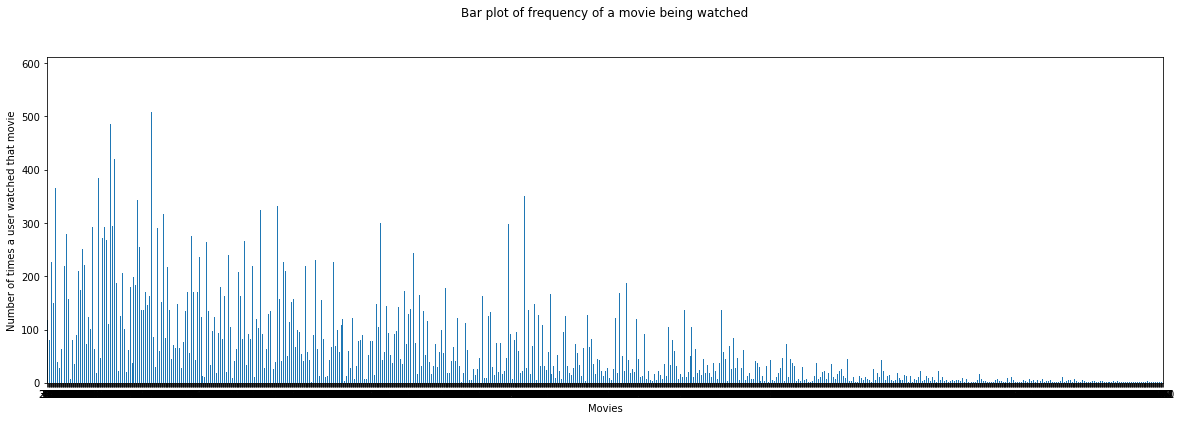

In [45]:
Merged_movies_ratings['movie id'].value_counts(sort=False).plot(kind='bar' ,figsize=(20,6), use_index = True, rot=0)
plt.title('Bar plot of frequency of a movie being watched')
plt.xlabel('Movies')
plt.ylabel('Number of times a user watched that movie')